In [1]:
from matplotlib import pyplot as plt
import common_functions as cf

## Task 1 - Load and Inspect the Data

In [19]:
import re

def my_csv_loader(filename, typemap = {}, debug = False, encoding = None):

    column_names = []
    column_names_to_index = {}
    rows = []

    # Split a comma separated string while observing quoted strings, e.g. "a,a",b,"c" would return ["a,a", "b", "c"]
    def split_line(line):
        line = line.rstrip("\n")
        line_split = re.split(r",(?=(?:[^\"']*[\"'][^\"']*[\"'])*[^\"']*$)", line)
        return [l.strip('"').strip("'") for l in line_split]

    with open(filename, encoding = encoding) as f:

        # First line contains column names
        column_names.extend(split_line(next(f)))

        if debug:
            print(column_names)

        # Map column name to zero based column index
        for i, c in enumerate(column_names):
            column_names_to_index[c] = i


        # Now load all the rows
        for line in f:

            vals = split_line(line)

            # All the values are now in string, perform type mapping (if any)
            for f,t in typemap.items():
                column_index = column_names_to_index[f]
                vals[column_index] = t(vals[column_index])

            rows.append(vals)

            if debug and len(rows) < 5:
                print(rows)


    return column_names, rows

column_names, rows = my_csv_loader("pop_year_trim.csv", {"2016" : int, "2017" : int, "2018" : int, "2019" : int, "2020" : int}, debug = True)


['', 'region', 'level of education', '2016', '2017', '2018', '2019', '2020']
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468], ['2', '01 Stockholm county', 'primary and lower secondary education', 254596, 254036, 254721, 254916, 254066]]
[['0', '01 Stockholm county', 'no information about level of educational attainment', 36560, 39554, 42113, 45984, 47399], ['1', '01 Stockholm county', 'post secondary education', 739424, 759083, 780086, 798639, 815468], ['2', '01 Stockholm county', '

In [20]:
import pandas as pd

# Load the data into a pandas DataFrame
df_first = pd.DataFrame(rows, columns=column_names)
# Use the first unnamed column as the index of the DF
df_first = df_first.set_index("")
df_first.head()

,region,level of education,2016,2017,2018,2019,2020
,,,,,,,
0,01 Stockholm county,no information about level of educational atta...,36560,39554,42113,45984,47399
1,01 Stockholm county,post secondary education,739424,759083,780086,798639,815468
2,01 Stockholm county,primary and lower secondary education,254596,254036,254721,254916,254066
4,01 Stockholm county,upper secondary education,616508,619697,619102,618354,616364
5,03 Uppsala county,no information about level of educational atta...,3729,4244,4787,5272,5197


## Task 2 - Data aggregation

In [21]:
# Filter to get only post secondary education
df_post_sec = df_first[df_first["level of education"] == "post secondary education"]
df_post_sec

,region,level of education,2016,2017,2018,2019,2020
,,,,,,,
1,01 Stockholm county,post secondary education,739424,759083,780086,798639,815468
6,03 Uppsala county,post secondary education,109558,112371,115469,118174,120953
11,04 Södermanland county,post secondary education,57884,59369,60789,61865,62861
16,05 Östergötland county,post secondary education,113978,117283,119769,122180,124378
21,06 Jönköping county,post secondary education,73668,76040,78010,79460,81054
26,07 Kronoberg county,post secondary education,43876,45130,46345,47125,47929
31,08 Kalmar county,post secondary education,49867,51128,52072,52687,53452
36,09 Gotland county,post secondary education,12583,12977,13230,13519,13895
41,10 Blekinge county,post secondary education,36034,36866,37305,37554,37986


In [22]:
# Get the population values post seconday education for Norrbotten 
pops = df_post_sec[df_post_sec.region == "25 Norrbotten county"][["2016", "2017", "2018", "2019", "2020"]].values[0]

print("Mean population with post-secondary education in the Norrbotten region in the last 5 years", cf.my_mean(pops))
print("Standard deviation population with post-secondary education in the Norrbotten region in the last 5 years", cf.my_std(pops))

# Standard deviation explains how much the values differ from the mean

Mean population with post-secondary education in the Norrbotten region in the last 5 years 56865.0
Standard deviation population with post-secondary education in the Norrbotten region in the last 5 years 731.5545092472604


In [23]:
#
# Calculate the mean population for each region in Sweden in the last 5 years.
#

# Function to group by a given column
def groupby(df, groupby):
    
    # We need to first sort on the grouping column
    df = df.sort_values(groupby)

    last = None
    group = []

    # Iterate through the dataset by row. Whenever a new value is found for the grouping column, that means
    # a new group has started and we emit/yield the last group
    for _,row in df.iterrows():

        # Check if we are on a new group
        if row[groupby] != last and len(group) > 0:
            # Return the group
            yield last, group
            group = []
        
        last = row[groupby]
        group.append(row)

    if len(group) > 0:
        yield last, group

# Function to perform an aggregate operation on columns in an existing grouping and return a new data frame
def groupby_aggregate(df_group, cols, fn_aggregate, group_column_name = None):

    groupnames = []
    col_sums = [[] for col in cols]

    # Iterate through all the gruops and apply the aggregate function to it
    for groupname, group in df_group:

        # Apply aggregate to each supplied column
        for i, col in enumerate(cols):
            sum = fn_aggregate([row[col] for row in group])
            col_sums[i].append(sum)
        
        groupnames.append(groupname)

    # Reformat the resulting data so that we can easily load it into a Pandas Data Frame
    d = {"group" if group_column_name is None else group_column_name : groupnames}

    for col, sums in zip(cols, col_sums):
        d[col] = sums

    return pd.DataFrame(d)

# Get population sums
df_sum_by_region = groupby_aggregate(groupby(df_first, "region"), 
                                     cols = ["2016", "2017", "2018", "2019", "2020"], 
                                     fn_aggregate = cf.my_sum,
                                     group_column_name = "region")

# Add mean
df_sum_by_region["mean_population"] = [cf.my_mean(p) for p in df_sum_by_region[["2016", "2017", "2018", "2019", "2020"]].values]
df_sum_by_region

,region,2016,2017,2018,2019,2020,mean_population
0,01 Stockholm county,1647088,1672370,1696022,1717893,1733297,1693334.0
1,03 Uppsala county,263678,268655,273058,277554,281029,272794.8
2,04 Södermanland county,204831,207175,208806,210189,210685,208337.2
3,05 Östergötland county,326677,330689,332748,334273,335837,332044.8
4,06 Jönköping county,250079,253040,255274,256699,257518,254522.0
5,07 Kronoberg county,137173,139233,140867,141706,142214,140238.6
6,08 Kalmar county,172272,174210,174491,174252,174075,173860.0
7,09 Gotland county,42636,42855,42991,43109,43268,42971.8
8,10 Blekinge county,112124,112933,113076,112675,112247,112611.0
9,12 Skåne county,948173,960493,970763,979283,987344,969211.2


<AxesSubplot:xlabel='region'>

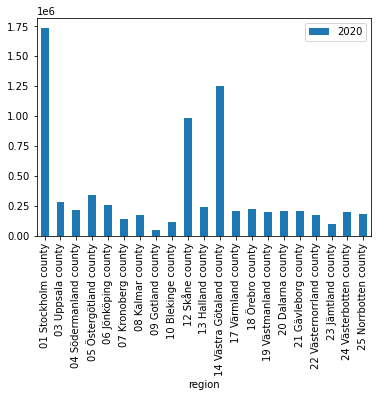

In [24]:
# Do a bar plot showing mean population per region
df_sum_by_region[["region", "2020"]].set_index("region").plot.bar()

# Second dataset

In [25]:
column_names, rows = my_csv_loader("income_data.csv", debug = True, encoding="latin-1", typemap = {"2020" : float})

df_income = pd.DataFrame()

# Load the data into a pandas DataFrame
df_income = pd.DataFrame(rows, columns=column_names)
df_income.head()

['region', 'age', '2020']
[['01 Stockholm county', '16 years', 4.6]]
[['01 Stockholm county', '16 years', 4.6], ['01 Stockholm county', '17 years', 8.8]]
[['01 Stockholm county', '16 years', 4.6], ['01 Stockholm county', '17 years', 8.8], ['01 Stockholm county', '18 years', 17.8]]
[['01 Stockholm county', '16 years', 4.6], ['01 Stockholm county', '17 years', 8.8], ['01 Stockholm county', '18 years', 17.8], ['01 Stockholm county', '19 years', 52.5]]


,region,age,2020
0,01 Stockholm county,16 years,4.6
1,01 Stockholm county,17 years,8.8
2,01 Stockholm county,18 years,17.8
3,01 Stockholm county,19 years,52.5
4,01 Stockholm county,20 years,112.0


When is it more appropriate to use the debugger for inspecting variable values, and when would you prefer to use a print function? Identify:
- One case when it is more convenient/efficient to use the debugger.
- One case when it is more convenient/efficient to use a printout.

From Kristofer:

- A debugger is more convenient when understanding control flow, e.g. which if-statements/branches that gets executed
- A printout could be more efficient, for example, in a loop that executes a large amount of times and it is only for a certain criteria that debug information is needded, e.g. every X iterations then a value should be printed

In [18]:
# Get mean income for each region
df_mean_income_by_region = groupby_aggregate(groupby(df_income, "region"), 
                                     cols = ["2020"], 
                                     fn_aggregate = cf.my_mean,
                                     group_column_name = "region")

df_mean_income_by_region

,region,2020
0,01 Stockholm county,334.803529
1,03 Uppsala county,293.469412
2,04 Södermanland county,271.477647
3,05 Östergötland county,276.969412
4,06 Jönköping county,275.427059
5,07 Kronoberg county,270.385882
6,08 Kalmar county,266.481176
7,09 Gotland county,259.274118
8,10 Blekinge county,270.797647
9,12 Skåne county,281.458824
